In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

Theoretically, having generated $n$ random integers between $0$ and $N$, we can find the expected number of unique values, $K$ given $N$ and $n$, by

$$ \mathbb{E}(K | N, n) = \sum_{k=1}^{k=n}{k \cdot \mathbb{P}(K =k | N, n)}$$

in which the probability of obtaining exactly $k$ unique values $(1 \leq k \leq n)$  could be calculated with the following formulas.

$$ \mathbb{P}(K = k | N, n) = \frac{\binom{N}{k} \cdot \sum_{m_1+...+m_k=n}{\binom{n}{m_1}}\binom{n-m_1}{m_2}...\binom{m_k}{m_k}}{N^n} = \frac{\binom{N}{k} \cdot \mathcal{F}(n,k)}{N^n}$$

$$ \sum_{m_1+...+m_k=n}{\binom{n}{m_1}}\binom{n-m_1}{m_2}...\binom{m_k}{m_k} = \mathcal{F}(n,k) = \begin{cases} 1, k=1\\ \sum_{j=1}^{j=n-k+1}{\binom{n}{j} \cdot \mathcal{F}(n-j,k-1)} , k \geq 2 \end{cases}$$

$\binom{N}{k}$ counts all the possibilities of which $k$ values are being picked, and $\mathcal{F}(n,k)$ calculates the number of distributions of those $k$ values among $n$ picks. The product of them divided by $N^n$, the total number of random combinations, gives the probability of obtaining exactly $k$ unique values.

Because the formulas above are tedious, we start by computing $\mathcal{F}(n,k)$ by a recursive approach and store the results in the matrix, $\mathbf{F}_{n \times n}$, such that $\mathbf{F}[i-1][j-1]=\mathcal{F}(i,j)$.

In [2]:
n = 100

# a function that helps compute matrix F
def g(M,m):
    if m==M:
        return 1
    else:
        a = sum(math.log(j,10) for j in range(m+1,M+1))
        b = sum(math.log(j,10) for j in range(1,M-m+1))
        return pow(10,a-b)

To avoid the problem of overflow, let $n$ be $100$, and take advantage of the property of the logarithm, $log_{10}(a)+log_{10}(b)=log_{10}(ab)$, to define a function to compute $\binom{M}{m}$:

$$ g(M,m) = 10^{log_{10} \binom{M}{m}} = \begin{cases} 1, \: M=m  \\ \: \\ 10^{\sum_{j=m+1}^{M}\:{log(j)} - \sum_{j=1}^{M-m}\:{log(j)}}, \: M>m   \end{cases}$$

Then $\mathcal{g}(M,m)$ will be used in computing $\mathcal{F}(n,k)$.

In [3]:
# construct matrix F
F = np.c_[np.ones((n,1)), np.zeros((n,n-1))]
j = 1
while not j==n:
    i = j
    while not i==n:
        F[i][j] = sum(g(i+1,t)*F[i-t][j-1] for t in range(1,i-j+2))
        i += 1
    j += 1

Let $N$ equal to $n, 2n, 4n, 8n, 16n, 32n, 64n$ respectively. Again, using the property of logarithms, we can calculate the expected number of unique values, $\mathbb{E}(K | N, n)$, in each of the seven cases.

$$ \mathbb{E}(K | N, n) = \sum_{k=1}^{k=n}{k \cdot 10^{log_{10}{\mathbb{P}(K=k|N,n)}}}$$

$$ log_{10}{\mathbb{P}(K=k|N,n)} = \begin{cases} log_{10}\mathcal{F}(n,k) - n \cdot log_{10}N, \: N=k   \\ \: \\  \sum_{j=k+1}^{N}{log_{10}(j)} - \sum_{j=1}^{N-k}{log_{10}(j)} + log_{10}\mathcal{F}(n,k) - n \cdot log_{10}N , \: N>k   \end{cases}$$

In [4]:
# compute E(K|N,n) for any N and n
def K_expected(N,n):
    k = 1
    E = 0
    while k<(n+1):
        if k==N:
            a = 0
        else:
            a = sum(math.log(j,10) for j in range(k+1,N+1))
            a -= sum(math.log(j,10) for j in range(1,N-k+1))
        A = a + math.log(F[n-1][k-1],10) - n * math.log(N,10)
        E += k * pow(10,A)
        k += 1
    return(E)

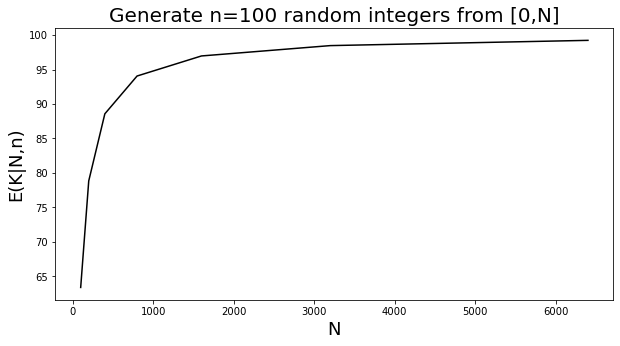

In [5]:
# a sequence of N to consider
N_vec = n * np.array([2**i for i in range(7)])
E_K = [K_expected(N,n) for N in N_vec]

# plot E(K|N,n) against N
plt.figure(figsize=(10,5))
plt.plot(N_vec, E_K,'k-')
plt.ylabel('E(K|N,n)', fontsize=18)
plt.xlabel('N', fontsize=18)
plt.title('Generate n=100 random integers from [0,N]', fontsize=20)
plt.show()

To verify the theoretical results above by experiments, generate $n$ random integers between $0$ and $N$, count the actual number of unique values, and repeat this process $1000$ times for each $N$ that has been set up. Store the values of N in the vector $\vec{x}$, the actual number of unique values in each experiment in $\vec{y}$, and the average number of unique values in $1000$ experiments for each $N$ in $\vec{yy}$.

In [6]:
num_repeat = 1000

x = [0]
y = [0]
yy = [0]

for N in N_vec:
    bear = [len(np.unique(np.random.randint(0,N, size=n))) for t in range(num_repeat)]
    x.extend([N for t in range(num_repeat)])
    y.extend(bear)
    yy.append(np.mean(bear))
    
x = x[1:]
y = y[1:]
yy = yy[1:]

Lastly, plot all the experimental data points, as well as the average number of actual unique values for each $N$ 

$$\bar{K}|N,n = \frac{\sum_{j=1}^{j=1000} k_j|N,n}{1000}$$

and the theoretical results, to illustrate the quantitative relationship between $n=100, N$, and $K | N,n$.

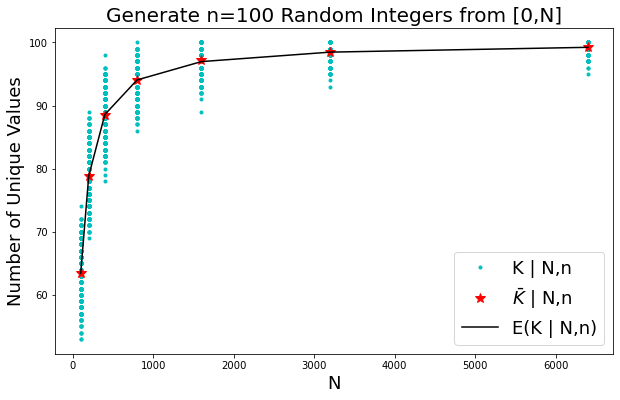

In [7]:
plt.figure(figsize=(10,6))
plt.plot(x, y, 'c.', label="K | N,n")
plt.plot(N_vec, yy, "r*", markersize=10, label=r"$\bar{K}$ | N,n")
plt.plot(N_vec, E_K, 'k-', label="E(K | N,n)")
plt.xlabel("N", fontsize=18)
plt.ylabel("Number of Unique Values", fontsize=18)
plt.title("Generate n=100 Random Integers from [0,N]", fontsize=20)
plt.legend(loc="lower right", fontsize=18)
plt.show()

As $N$ goes up, the number of unique values among $n=100$ random integers sampled from $[0,N]$ (i.e $K | N,n$) fluctuates less and less strongly, and not surprisingly, appears to converge to $100$. In addition, for every $N$ we look into, the average of $K$ (i.e $\bar{K} | N, n$) only insignificantly differs from the analytical mean $\mathbb{E}(K | N,n)$, suggesting that the empirical results agree with the theoretical formula.